In [4]:
#다중분류. 7개에서 해당에 속할 확률은?

import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()
'''
	Species	Weight	Length	Diagonal	Height	Width
0	Bream	242.0	25.4	30.0	11.5200	4.0200
1	Bream	290.0	26.3	31.2	12.4800	4.3056
2	Bream	340.0	26.5	31.1	12.3778	4.6961
3	Bream	363.0	29.0	33.5	12.7300	4.4555
4	Bream	430.0	29.0	34.0	12.4440	5.1340
'''

'\n\tSpecies\tWeight\tLength\tDiagonal\tHeight\tWidth\n0\tBream\t242.0\t25.4\t30.0\t11.5200\t4.0200\n1\tBream\t290.0\t26.3\t31.2\t12.4800\t4.3056\n2\tBream\t340.0\t26.5\t31.1\t12.3778\t4.6961\n3\tBream\t363.0\t29.0\t33.5\t12.7300\t4.4555\n4\tBream\t430.0\t29.0\t34.0\t12.4440\t5.1340\n'

In [5]:
print(pd.unique(fish['Species'])) #['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']  => species를 target 나머지를 데이터로

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [8]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()   # 넘파이로 변경
#print(fish_input)
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [14]:
#k 최근접 이웃 분류기의 예측
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print("훈련 데이터 점수 : ", kn.score(train_scaled, train_target))   #훈련 데이터 점수 :  0.8907563025210085
print("테스트 데이터 점수 : ", kn.score(test_scaled, test_target))   #테스트 데이터 점수 :  0.85

#주의# => pd.unique의 순서와 타깃값을 그대로 모델에 전달하면 순서는 알파벳으로 매겨진다.
print("타깃값 순서 : ", kn.classes_) #타깃값 순서 :  ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
print(kn.predict(test_scaled[:5]))  #['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']

import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))
'''[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
 '''

훈련 데이터 점수 :  0.8907563025210085
테스트 데이터 점수 :  0.85
타깃값 순서 :  ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


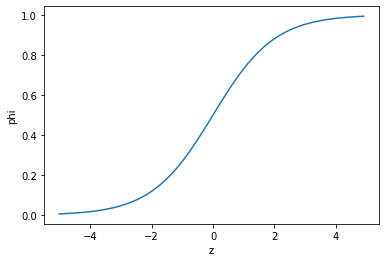

In [15]:
#시그모이드 함수의 활용 => 함수의 출력이 0.5보다 크면 양성(1), 0.5보다 작으면 음성(0)
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()


In [ ]:
#page185 ~ 188 아직 안함

#이진분류를 위해서 도미(bream), 빙어(smelt)만 골라내기
bream_smelt_indexes = (train_target == 'Bream') 